In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [ ]:
df = pd.read_csv('loan_sanction_test.csv')

In [ ]:
df = df.drop_duplicates()
# Fill missing categorical with mode, continuous with median
for col in df.columns:
    if df[col].dtype == 'O':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

# Cast object cols to 'category' for plotting purposes
for col in df.select_dtypes('object').columns:
    df[col] = df[col].astype('category')

In [ ]:
# Identify variable types
cat_cols = [
    'Gender', 'Married', 'Dependents', 'Education',
    'Self_Employed', 'Property_Area'
]
cont_cols = [
    'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
    'Loan_Amount_Term', 'Credit_History'
]

In [ ]:
# Categorical vs Categorical
####################################################

# Example: Education vs Property_Area
cross = pd.crosstab(df['Education'], df['Property_Area'])

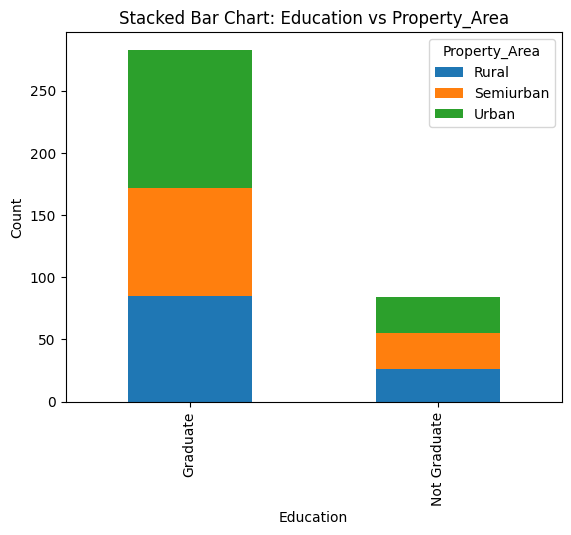

In [ ]:
# Stacked Bar Chart
cross.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart: Education vs Property_Area')
plt.ylabel('Count')
plt.show()

The stacked bar chart helps you see the distribution of 'Property_Area' within each 'Education' group. For example, you can see how many 'Graduate' individuals live in Rural, Semiurban, and Urban areas, and compare that distribution to 'Not Graduate' individuals.
cross.plot(kind='bar', stacked=True): This line creates the bar plot.
cross: This is the DataFrame containing the cross-tabulation of 'Education' and 'Property_Area', created in the previous cell.
kind='bar': Specifies that the plot should be a bar chart.
stacked=True: This crucial argument makes the bars stacked, meaning for each 'Education' category (Graduate, Not Graduate), the bars representing 'Property_Area' (Rural, Semiurban, Urban) will be stacked on top of each other.
plt.title('Stacked Bar Chart: Education vs Property_Area'): Sets the title of the plot.
plt.ylabel('Count'): Sets the label for the y-axis to 'Count'.
plt.show(): Displays the generated plot.


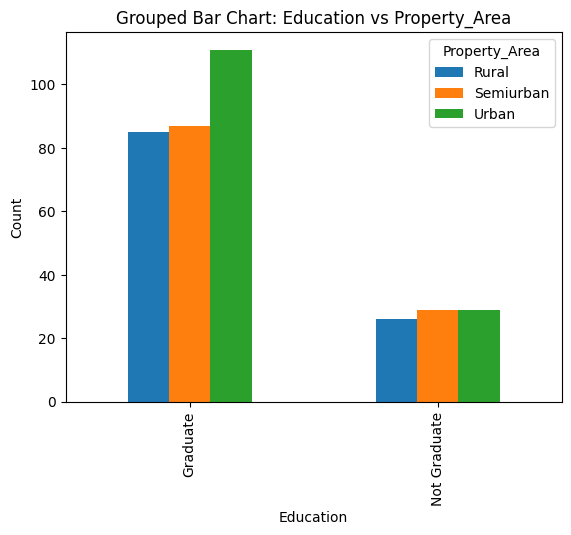

In [ ]:
# Grouped Bar Chart
cross.plot(kind='bar')
plt.title('Grouped Bar Chart: Education vs Property_Area')
plt.ylabel('Count')
plt.show()

, the grouped bar chart shows the counts for each 'Property_Area' side-by-side for each 'Education' group. This makes it easier to directly compare the number of individuals in each property area within a given education level. For instance, you can easily see the difference in the number of Graduates living in Rural, Semiurban, and Urban areas.



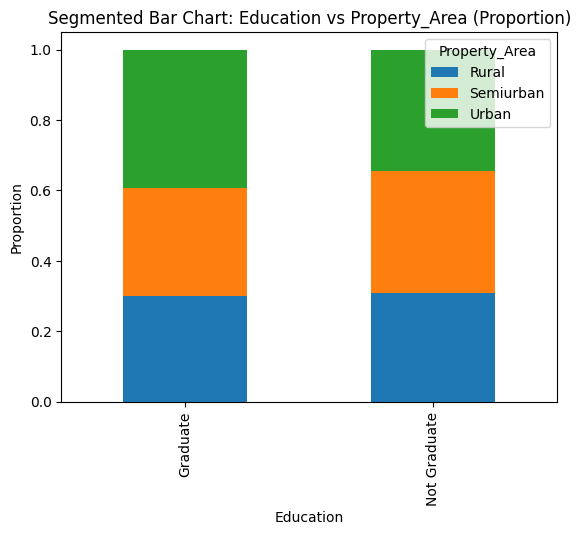

In [ ]:
# Segmented Bar Chart (proportion)
proportions = cross.div(cross.sum(axis=1), axis=0)
proportions.plot(kind='bar', stacked=True)
plt.title('Segmented Bar Chart: Education vs Property_Area (Proportion)')
plt.ylabel('Proportion')
plt.show()

This segmented bar chart is useful for comparing the relative distribution of property areas between education levels, regardless of the total number of individuals in each education group. For example, you can see if the proportion of individuals living in urban areas is significantly different between graduates and non-graduates.

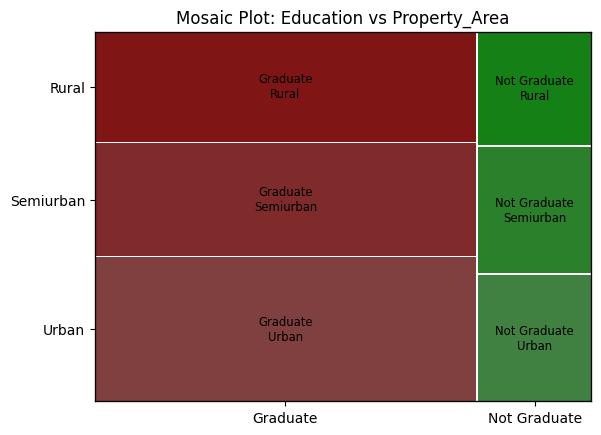

In [ ]:
# Mosaic Plot
from statsmodels.graphics.mosaicplot import mosaic
mosaic(df, ['Education', 'Property_Area'])
plt.title('Mosaic Plot: Education vs Property_Area')
plt.show()

The mosaic plot is a graphical way to display the relationship between two or more categorical variables. The area of each rectangle in the plot is proportional to the number of observations in that category. It helps to visualize the joint distribution and identify potential associations between the variables.

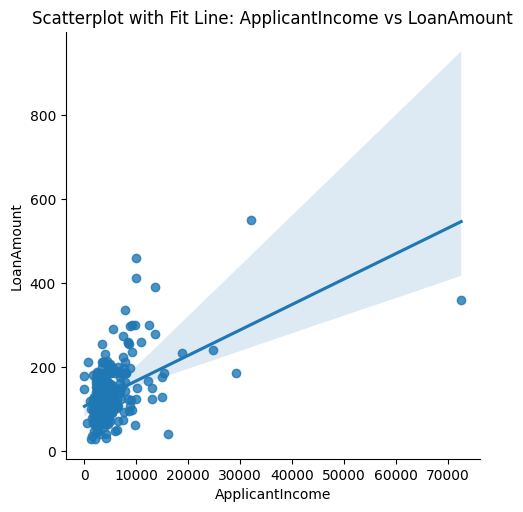

In [ ]:
####################################################
# Continuous vs Continuous
####################################################

# Scatterplot with Fit Line
sns.lmplot(data=df, x='ApplicantIncome', y='LoanAmount')
plt.title('Scatterplot with Fit Line: ApplicantIncome vs LoanAmount')
plt.show()

This plot helps you visualize the relationship between these two continuous variables. The scatterplot shows the individual data points, and the fit line indicates the general trend. The shaded area around the line represents the confidence interval for the regression line. This allows you to see if there is a linear relationship between applicant income and the loan amount, and how strong that relationship might be.

/tmp/ipython-input-4215884401.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Education')['ApplicantIncome'].mean().plot(kind='bar')


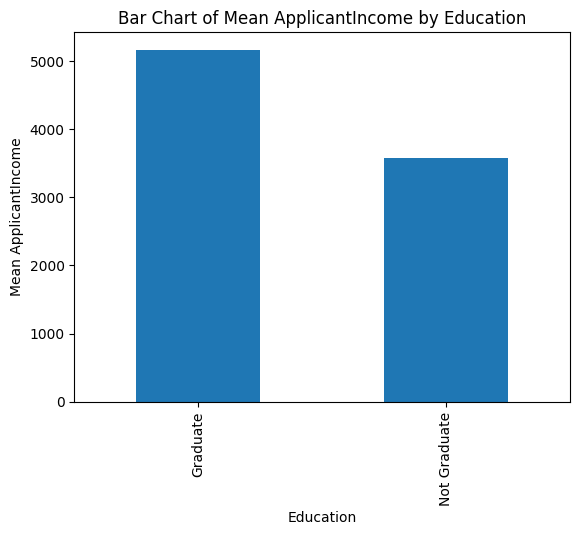

In [ ]:
####################################################
# Categorical vs Continuous
####################################################

# Example: Education (categorical) vs ApplicantIncome (continuous)

# Bar Chart of summary statistics
df.groupby('Education')['ApplicantIncome'].mean().plot(kind='bar')
plt.title('Bar Chart of Mean ApplicantIncome by Education')
plt.ylabel('Mean ApplicantIncome')
plt.show()

This bar chart helps visualize how the average income differs between individuals with different education levels (Graduate vs. Not Graduate). You can quickly compare the mean applicant income for each education group.

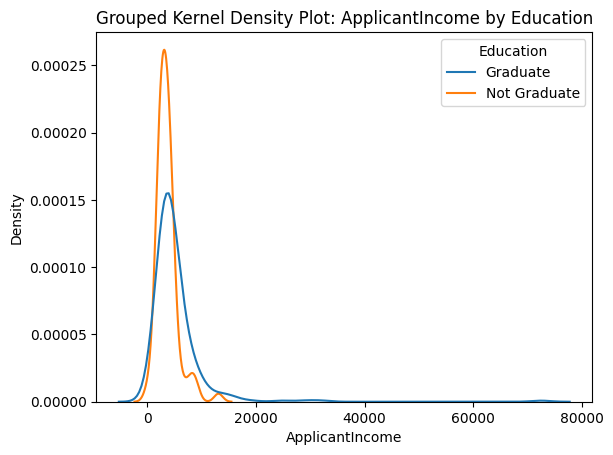

In [ ]:
# Grouped Kernel Density Plot
sns.kdeplot(data=df, x='ApplicantIncome', hue='Education', common_norm=False)
plt.title('Grouped Kernel Density Plot: ApplicantIncome by Education')
plt.show()

The grouped KDE plot shows the estimated probability density function for 'ApplicantIncome' for each education level. It helps you understand the shape of the distribution (e.g., whether it's skewed, has multiple peaks) and compare the distributions between the 'Graduate' and 'Not Graduate' groups. For example, you can see if the incomes are generally higher or lower for one group compared to the other, and how spread out the incomes are within each group.

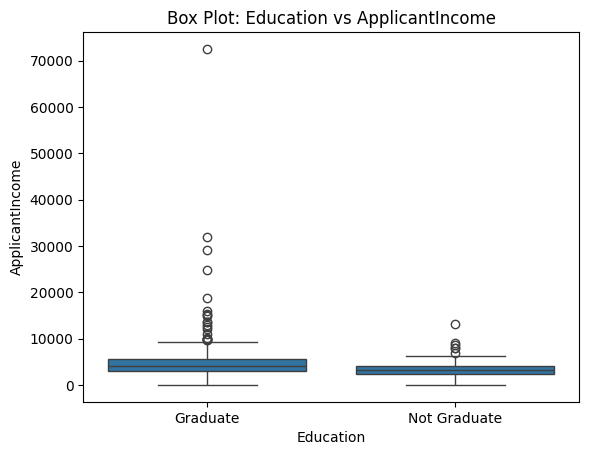

In [ ]:
# Box Plot
sns.boxplot(data=df, x='Education', y='ApplicantIncome')
plt.title('Box Plot: Education vs ApplicantIncome')
plt.show()

A box plot is a great way to visualize the distribution of a continuous variable across different categories. Each box represents the interquartile range (IQR), the line inside the box is the median, and the "whiskers" extend to the minimum and maximum values within 1.5 times the IQR. Points outside the whiskers are considered outliers. This plot allows you to easily compare the median, spread, and presence of outliers in 'ApplicantIncome' for both 'Graduate' and 'Not Graduate' groups.

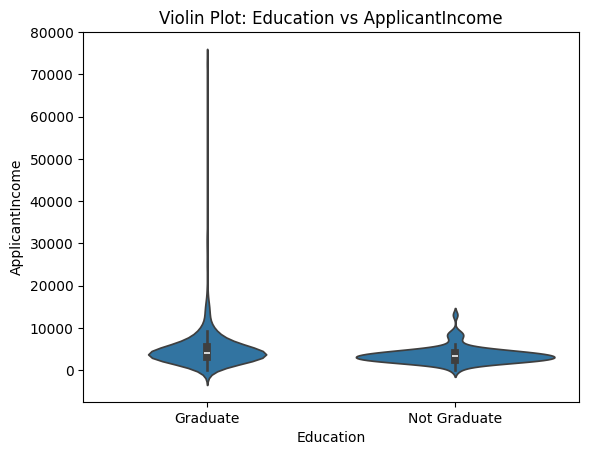

In [ ]:
# Violin Plot
sns.violinplot(data=df, x='Education', y='ApplicantIncome')
plt.title('Violin Plot: Education vs ApplicantIncome')
plt.show()

A violin plot is similar to a box plot but provides a richer representation of the distribution. It shows the probability density of the data at different values, smoothed by a kernel density estimator. The width of the "violin" at each level represents the density of data points at that value. Like box plots, violin plots also show the median (the thick line inside the violin) and the interquartile range (the thinner line). This plot helps you see the shape of the distribution, including modes (peaks) and spread, for each category.

/usr/local/lib/python3.12/dist-packages/joypy/joyplot.py:176: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(by)


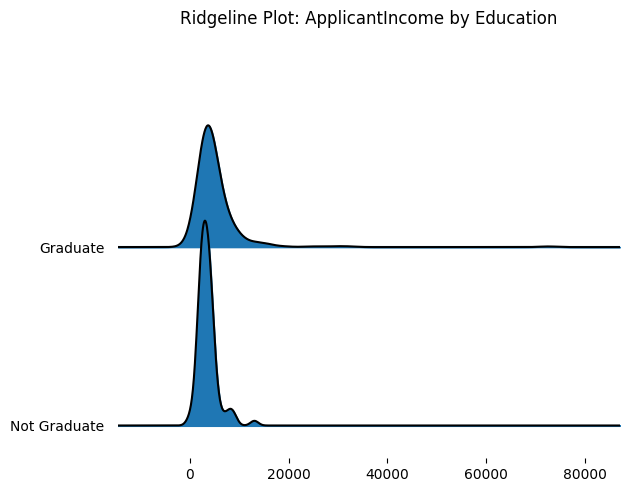

In [ ]:
# Ridgeline Plot
import joypy
joypy.joyplot(df, by='Education', column='ApplicantIncome')
plt.title('Ridgeline Plot: ApplicantIncome by Education')
plt.show()

A ridgeline plot is a series of density plots arranged vertically, with each plot representing the distribution of a continuous variable for a different category of a categorical variable. It's a good way to compare the distributions of a continuous variable across multiple groups, especially when you have many categories. In this plot, you can see the distribution of 'ApplicantIncome' for both 'Graduate' and 'Not Graduate' individuals, making it easy to visually compare their income distributions.

/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 9.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


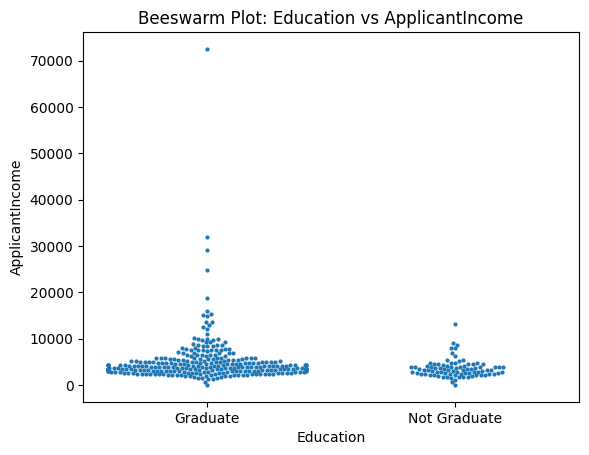

In [ ]:
# Beeswarm Plot
sns.swarmplot(data=df, x='Education', y='ApplicantIncome', size=3)
plt.title('Beeswarm Plot: Education vs ApplicantIncome')
plt.show()

A beeswarm plot is a type of scatter plot that plots each data point individually, with points adjusted to avoid overlapping. This allows you to see the distribution of the continuous variable within each category and identify clusters or gaps in the data. In this plot, you can see the individual 'ApplicantIncome' values for each 'Education' level, providing a detailed view of the data points.

In [ ]:
!pip install joypy